In [1]:
import math
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Wichtige Daten
window_surfaces= np.array(
    [[(0,0,1),(0,2,1),(0,2,2),(0,0,2)],
     [(0.2,0,1),(0.2,2,1),(0.2,2,2),(0.2,0,2)]])

sonne_azimut = 30
sonne_hoehe = 30

###

print(window_surfaces)

[[[0.  0.  1. ]
  [0.  2.  1. ]
  [0.  2.  2. ]
  [0.  0.  2. ]]

 [[0.2 0.  1. ]
  [0.2 2.  1. ]
  [0.2 2.  2. ]
  [0.2 0.  2. ]]]


[-0.15240531  0.97620649  0.15425145]


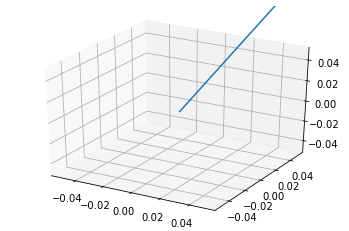

In [3]:
# Sonnenvektor berechnen (Kugelkoordinaten zu kartesischen Koordinaten)
sun_vector = np.array([
    math.sin(sonne_hoehe)*math.cos(sonne_azimut),
    math.sin(sonne_hoehe)*math.sin(sonne_azimut),
    math.cos(sonne_hoehe)])

### Nur zur Ansicht ###

print(sun_vector)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, sun_vector[0], sun_vector[1], sun_vector[2])
plt.show()

In [4]:
# Berechne Durchstoßpunkte mit X-Y Ebene (z immer 0)
# Methode hier erklärt: https://www.youtube.com/watch?v=STwIlYF21D0
shadow_points = []

for surface in window_surfaces:
    shadow_points_tmp = []
    for point in surface:
        r = point[2] / (-1 * sun_vector[2])
        shadow_points_tmp.append(np.round(point + r * sun_vector, 3))   
    shadow_points.append(shadow_points_tmp)
    
# TODO: clipping (praktisch gesehen wird der Schnitt des 'Schattens' von allen Flächen gebildet)

###
        
shadow_points = np.array(shadow_points)
print("x\ty\tz\t\n", shadow_points)



x	y	z	
 [[[  0.988  -6.329   0.   ]
  [  0.988  -4.329   0.   ]
  [  1.976 -10.657   0.   ]
  [  1.976 -12.657   0.   ]]

 [[  1.188  -6.329   0.   ]
  [  1.188  -4.329   0.   ]
  [  2.176 -10.657   0.   ]
  [  2.176 -12.657   0.   ]]]


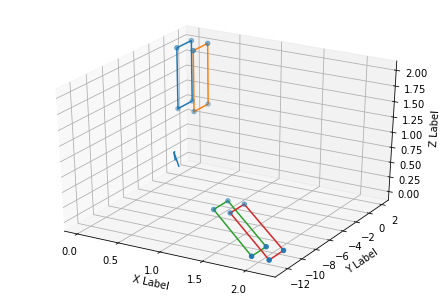

In [5]:
### Nur zur grafischen Anzeige, keine weitere Relevanz ###

# Plotte Fenster (in Punkten)
dots = []

for surface in window_surfaces:
    for point in surface:
        dots.append(point)
        
for shadow_point_surface in shadow_points:
    for shadow_point in shadow_point_surface: 
        dots.append(shadow_point)
    
fig = pyplot.figure()
ax = Axes3D(fig)

x_vals = []
y_vals = []
z_vals = []

for dot in dots:
    x_vals.append(dot[0])
    y_vals.append(dot[1])
    z_vals.append(dot[2])
    
ax.scatter(x_vals, y_vals, z_vals)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Sonnenvektor
ax.quiver(0, 0, 0, sun_vector[0], sun_vector[1], sun_vector[2])

# Fensterkontur
for window_surface in window_surfaces:
    X = []
    Y = []
    Z = []
    for point in window_surface:
        X.append(point[0])
        Y.append(point[1])
        Z.append(point[2])
    # Für geschlossene Kontur
    X.append(X[0])
    Y.append(Y[0])
    Z.append(Z[0])
    
    ax.plot(X,Y,Z)
    
# Schattenkontur
for shadow_point in shadow_points:
    X = []
    Y = []
    Z = []
    for point in shadow_point:
        X.append(point[0])
        Y.append(point[1])
        Z.append(point[2])
    # Für geschlossene Kontur
    X.append(X[0])
    Y.append(Y[0])
    Z.append(Z[0])
    
    ax.plot(X,Y,Z)


pyplot.show()
plt.show()